# Technical Indicators

In [1]:
# !pip install TA_Lib-0.4.19-cp37-cp37m-win_amd64.whl

In [9]:
import talib
import matplotlib.pyplot as plt
import pandas as pd

## Trend Indicators: MAs

In [12]:
stock_data = pd.read_csv('Data/GOOG.csv', index_col='Date', parse_dates=True)
stock_data = stock_data.iloc[-365:]

### Calculate and plot two EMAs
A 12-period EMA and 26-period EMA are two moving averages used in calculating a more complex indicator called MACD (Moving Average Convergence Divergence). The MACD turns two EMAs into a momentum indicator by subtracting the longer EMA from the shorter one. Before learning more about MACD, you want to get familiar with its components first. You decide to calculate two EMAs using the Google daily stock prices and plot them in one chart.

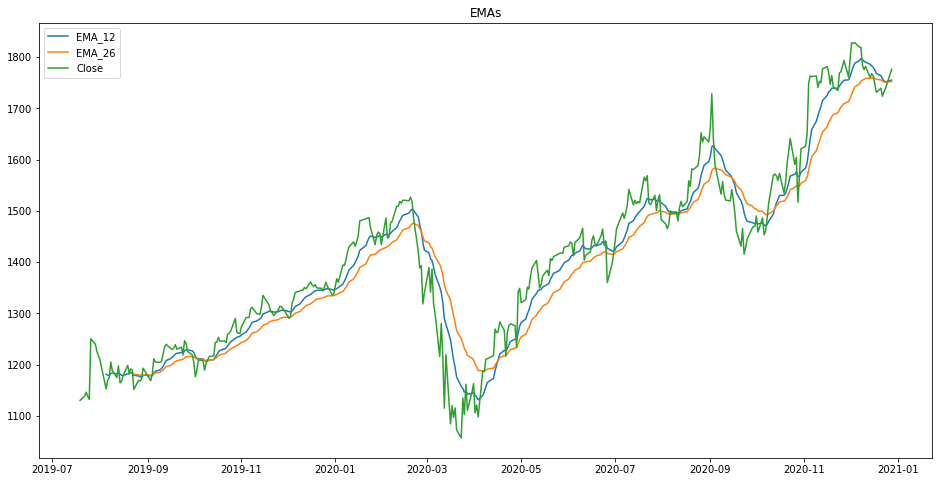

In [13]:
# Calculate 12-day EMA
stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# Calculate 26-day EMA
stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

plt.figure(figsize=(16, 8))

# Plot the EMAs with price
plt.plot(stock_data['EMA_12'], label='EMA_12')
plt.plot(stock_data['EMA_26'], label='EMA_26')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()

### SMA vs. EMA
SMA and EMA are both commonly-used trend indicators. SMA gives equal weight to all data points, while EMA applies more weight to recent data points. You have some Google stock price data and want to decide on a moving average indicator to use. You plan to calculate both the SMA and EMA with the same lookback period and plot them in one chart.

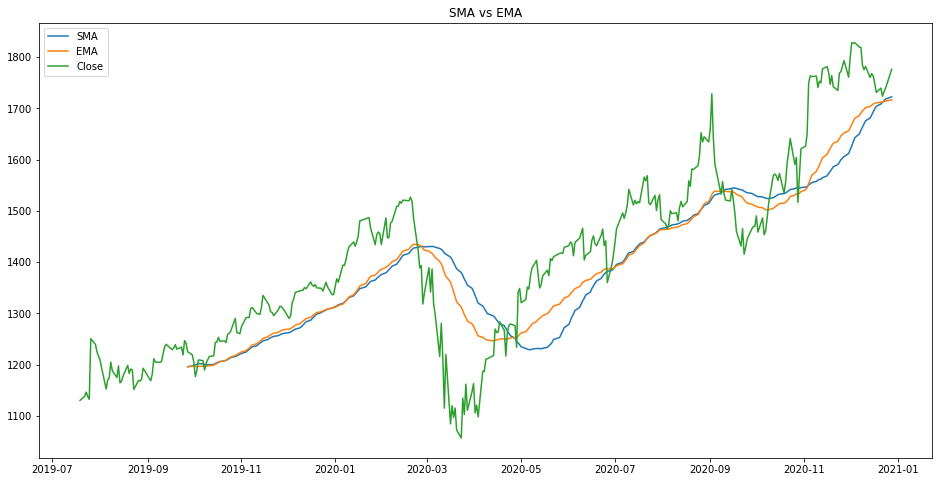

In [14]:
# Calculate the SMA
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=50)
# Calculate the EMA
stock_data['EMA'] = talib.EMA(stock_data['Close'], timeperiod=50)

plt.figure(figsize=(16, 8))

# Plot the SMA, EMA with price
plt.plot(stock_data['SMA'], label='SMA')
plt.plot(stock_data['EMA'], label='EMA')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA')
plt.show()

## Strength Indicators: ADX

In [22]:
stock_data = pd.read_csv('Data/TSLA.csv', index_col='Date', parse_dates=True)
stock_data = stock_data.iloc[-365:]
stock_data = stock_data.drop(['Adj Close', 'Volume'], axis = 1)

### Calculate the ADX
The average directional movement index (ADX) was developed by J. Welles Wilder as an indicator of trend strength. It combines two other indicators, the plus directional index (+DI) and minus directional indicator (-DI), and is obtained using lengthy calculations. However, with Python, you can calculate it with one line of code. In this exercise, you will implement your first ADX indicator using daily price data of the Tesla stock.

In [23]:
# Calculate the ADX with the default time period
stock_data['ADX_14'] = talib.ADX(stock_data['High'], 
                            stock_data['Low'],
                            stock_data['Close'])

# Calculate the ADX with the time period set to 21
stock_data['ADX_21'] = talib.ADX(stock_data['High'], 
                            stock_data['Low'],
                            stock_data['Close'], timeperiod = 21)

# Print the last five rows
print(stock_data.tail())

              Open    High    Low   Close     ADX_14     ADX_21
Date                                                           
2020-12-11  615.01  624.00  596.8  609.99  30.708111  22.736224
2020-12-14  619.00  642.75  610.2  639.83  30.351997  22.872343
2020-12-15  643.28  646.90  623.8  633.25  30.118955  23.047114
2020-12-16  628.23  632.50  605.0  622.77  29.154702  22.869302
2020-12-17  628.19  658.82  619.5  655.90  28.917346  22.997637


### Visualize the ADX
The ADX can quantify the strength of a trend, but does not suggest the bullish or bearish trend direction. Typically an ADX value above 25 indicates that a trending market is present. To better understand it, you will calculate the ADX and plot it along with the price data.

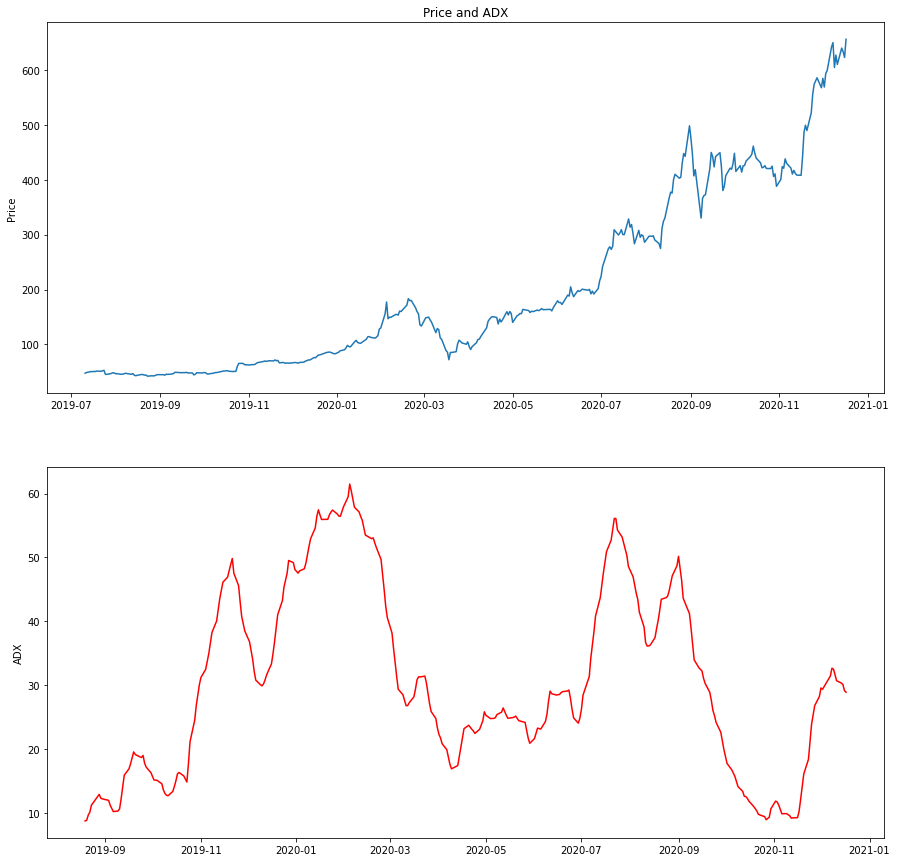

In [30]:
# Calculate ADX
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

## Momentum Indicators: RSI

In [31]:
stock_data = pd.read_csv('Data/GOOG.csv', index_col='Date', parse_dates=True)
stock_data = stock_data.iloc[-365:]
stock_data = stock_data.drop(['Adj Close', 'Volume'], axis = 1)

### Calculate the RSI
The RSI calculation follows a straightforward formula. RS, or Relative Strength, is the average of upward price changes in a chosen n periods, divided by the average of downward price changes over those n periods.

$ RSI = 100 - 100/(1 + RS)$

Where: RS = average of upward price changes / average of downward price changes

All these calculations can be handled in Python with one line of code. In this exercise, you will do your first RSI calculation using historical daily price data of the Google stock.

In [32]:
# Calculate RSI with the default time period
stock_data['RSI_14'] = talib.RSI(stock_data['Close'])

# Calculate RSI with a time period of 21
stock_data['RSI_21'] = talib.RSI(stock_data['Close'], timeperiod = 21)

# Print the last five rows
print(stock_data.tail())

               Open     High      Low    Close     RSI_14     RSI_21
Date                                                                
2020-12-21  1713.51  1740.85  1699.00  1739.37  46.508230  51.552360
2020-12-22  1734.43  1737.41  1712.57  1723.50  43.174769  49.352742
2020-12-23  1728.11  1747.99  1725.04  1732.38  45.527455  50.591331
2020-12-24  1735.00  1746.00  1729.11  1738.85  47.241381  51.498744
2020-12-28  1751.64  1790.73  1746.33  1776.09  55.851687  56.344237


### Visualize the RSI
The RSI is a momentum indicator that oscillates between 0 and 100. Typically an RSI over 70 indicates an overbought market condition, which means the asset is overvalued and the price may reverse. An RSI below 30 suggests an oversold market condition, which means the asset is undervalued and the price may rally. To better understand it, you will calculate the RSI and plot it along with the price data.

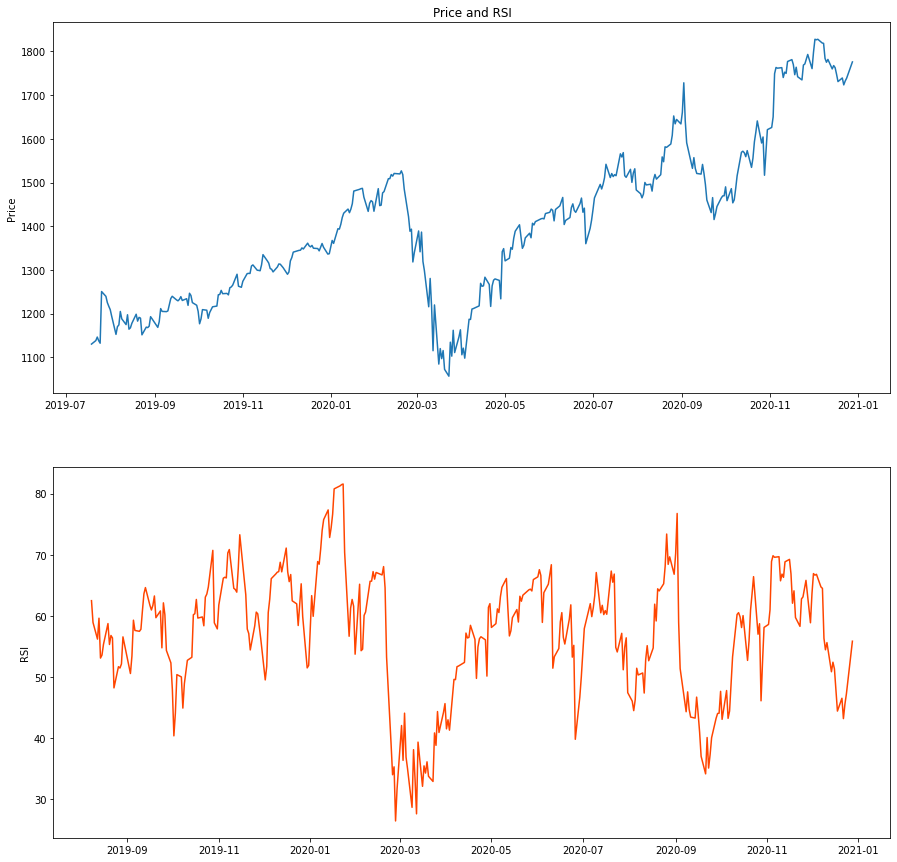

In [34]:
# Calculate RSI
stock_data['RSI'] = talib.RSI(stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(stock_data['RSI'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

## Volatility Indicators: Bollinger Bands

In [35]:
# Load the data
bitcoin_data = pd.read_csv('Data/Bitcoin.csv', index_col='Date', parse_dates=True)
bitcoin_data = bitcoin_data.iloc[-365:]
bitcoin_data = bitcoin_data.drop(['Volume'], axis = 1)

### Implement Bollinger Bands
Bollinger Bands are envelopes plotted above and below a simple moving average of the price. Because the distance of the bands is based on the standard deviation, they adjust to volatility swings in the underlying price.

To better understand the impact of standard deviation specification on Bollinger bands, you will implement and plot two sets of Bollinger Bands on the same dataset.

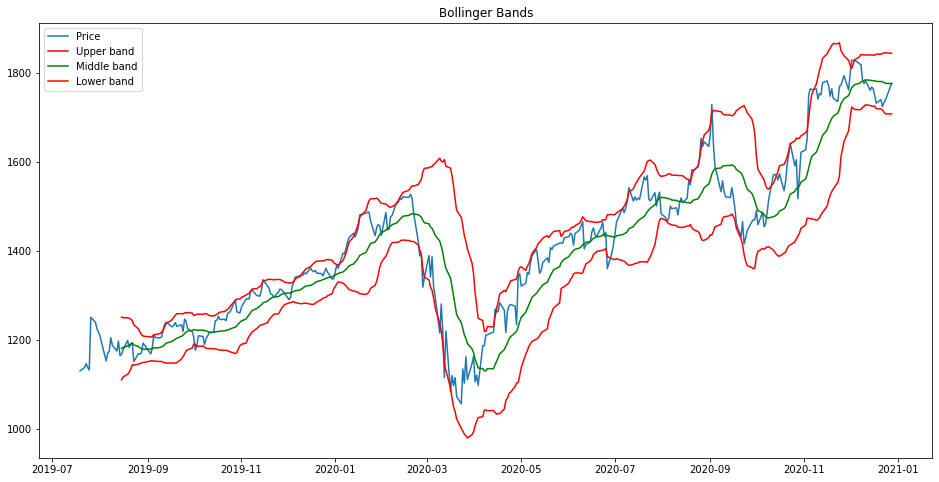

In [39]:
# Define the Bollinger Bands
upper, mid, lower = talib.BBANDS(stock_data['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

plt.figure(figsize=(16, 8))

# Plot the Bollinger Bands 
plt.plot(stock_data['Close'], label='Price')
plt.plot(upper, color='Red' , label='Upper band')
plt.plot(mid, color='Green', label='Middle band')
plt.plot(lower, color='Red', label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()